In [1]:
import jax
import jax.numpy as jnp
import chex

from typing import NamedTuple

from experior.utils import PRNGSequence, moving_average
from experior.rl_agents.utils import QNetwork, ActorCritic

jax.config.update("jax_debug_nans", True)

%load_ext autoreload
%autoreload 2


2024-01-22 22:13:59.732209: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /pkgs/cuda-11.8/lib64:/h/vdblm/pkgs/cuda-11.8/lib64:/pkgs/cudnn-11.x-v8.9.2/lib
2024-01-22 22:13:59.732427: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /pkgs/cuda-11.8/lib64:/h/vdblm/pkgs/cuda-11.8/lib64:/pkgs/cudnn-11.x-v8.9.2/lib
2024-01-22 22:13:59.732439: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [2]:
ppo_config = {
  "learning_rate": 2.5e-4,
  "steps": 5e5,
  "train_frequency": 128,
  "num_actors": 4,
  "max_grad_norm": 0.5,
  "epochs_per_iteration": 4,
  "num_minibatches": 4,
  "ent_coef": 0.1
}

## Environment

In [8]:
from experior.envs import CartPole
env = CartPole()

## PPO

In [9]:
from experior.rl_agents import make_discrete_ppo_train
actor_critic_network = ActorCritic(action_dim=env.action_space(env.default_params).n,
                                   activation="tanh")

ppo_train = make_discrete_ppo_train(env=env,
                                    actor_critic_network=actor_critic_network,
                                    num_envs=1,
                                    **ppo_config)

In [10]:
jax.config.update("jax_disable_jit", False)
ppo_train = jax.jit(ppo_train)
state, ppo_output = ppo_train(jax.random.PRNGKey(4536))

In [13]:
ppo_output['trajectories'].info.keys()

dict_keys(['discount'])

In [16]:
rewards = ppo_output['trajectories'].info["discount"]

In [17]:
rewards.shape

(977, 128, 1, 4)

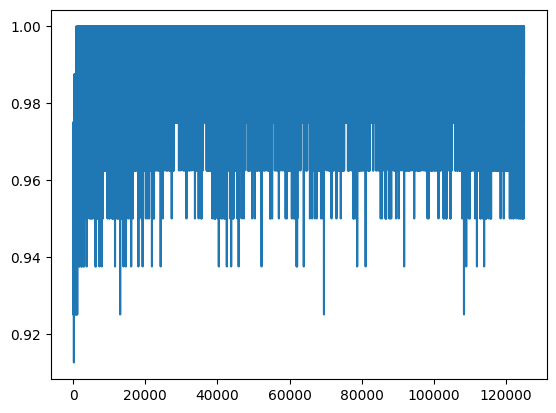

In [15]:
import matplotlib.pyplot as plt
plt.plot(moving_average(rewards, 20))